<a href="https://colab.research.google.com/github/HASBI019/weather-temperature-prediction/blob/main/UTS%20MACHINE%20LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Kasus:
Dinas cuaca ingin mengetahui bagaimana variabel cuaca seperti kelembapan,
tekanan udara, dan kecepatan angin memengaruhi suhu harian.

Tujuan:
- Memprediksi suhu berdasarkan variabel cuaca.
- Menyiapkan data agar siap untuk pemodelan prediksi suhu di tahap berikutnya.

Metode:
Menggunakan tahapan Data Science berdasarkan SKKNI:
1. Business Understanding
2. Data Understanding
3. Data Preparation
"""
print("Tahap 1: Business Understanding selesai dijelaskan.")

Tahap 1: Business Understanding selesai dijelaskan.


#DATA UNDERSTANDING

In [2]:
import pandas as pd

df = pd.read_csv("/content/weatherHistory.csv")

df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [6]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

#DATA PREPARATION

In [7]:
df = df.drop(columns=['Daily Summary', 'Loud Cover'])

df = df.dropna(subset=['Precip Type'])

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

df = df.rename(columns={
    'Formatted Date': 'date',
    'Temperature (C)': 'temperature',
    'Apparent Temperature (C)': 'apparent_temp',
    'Wind Speed (km/h)': 'wind_speed',
    'Wind Bearing (degrees)': 'wind_bearing',
    'Visibility (km)': 'visibility',
    'Pressure (millibars)': 'pressure',
    'Precip Type': 'precip_type'
})

df.head()

,date,Summary,precip_type,temperature,apparent_temp,Humidity,wind_speed,wind_bearing,visibility,pressure
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [8]:
df.isnull().sum()

,0
date,0
Summary,0
precip_type,0
temperature,0
apparent_temp,0
Humidity,0
wind_speed,0
wind_bearing,0
visibility,0
pressure,0


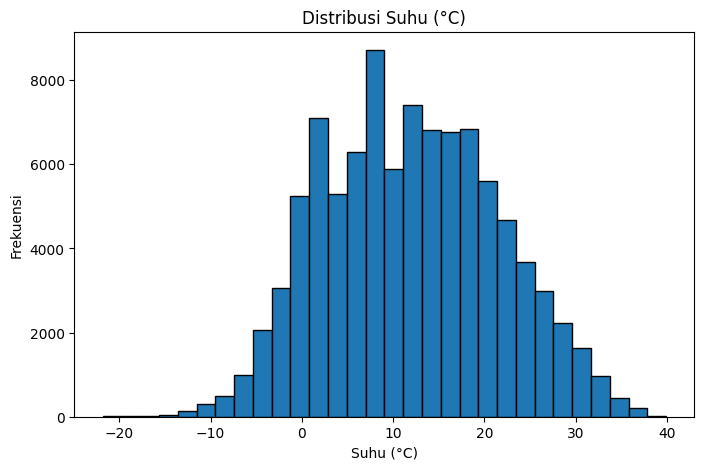

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['temperature'], bins=30, edgecolor='black')
plt.title('Distribusi Suhu (°C)')
plt.xlabel('Suhu (°C)')
plt.ylabel('Frekuensi')
plt.show()

#MODELING

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df[['Humidity', 'wind_speed', 'pressure']]
y = df['temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [11]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Evaluasi Model:
Mean Absolute Error (MAE): 5.87
R-squared (R2): 0.42


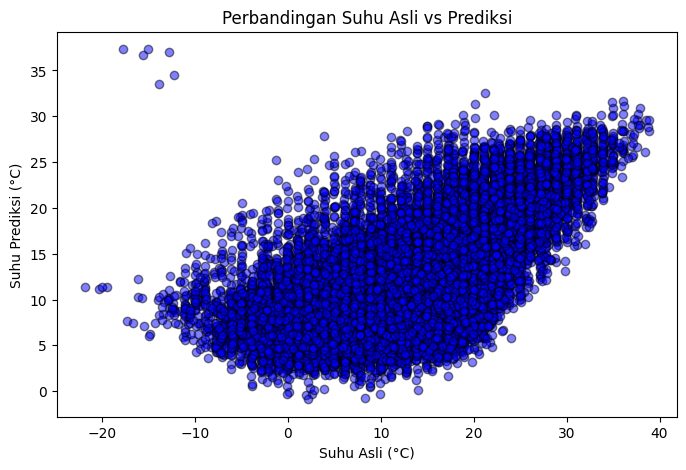

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel("Suhu Asli (°C)")
plt.ylabel("Suhu Prediksi (°C)")
plt.title("Perbandingan Suhu Asli vs Prediksi")
plt.show()

## Kesimpulan

1. **Business Understanding**  
   Tujuan dari proyek ini adalah memprediksi suhu berdasarkan data cuaca (kelembapan, kecepatan angin, dan tekanan udara) agar dapat membantu instansi cuaca dalam analisis pola iklim.

2. **Data Understanding**  
   Dataset berisi data cuaca seperti suhu, kelembapan, kecepatan angin, tekanan udara, dan lain-lain.  
   Ditemukan 517 nilai kosong pada kolom *Precip Type*.

3. **Data Preparation**  
   - Menghapus kolom yang tidak relevan (`Daily Summary`, `Loud Cover`).  
   - Menghapus baris kosong pada *Precip Type*.  
   - Mengubah format tanggal dan menstandarkan nama kolom.  

4. **Modeling**  
   Menggunakan **Linear Regression** untuk memprediksi suhu (`temperature`) berdasarkan variabel:  
   - `Humidity`  
   - `wind_speed`  
   - `pressure`

   Hasil evaluasi model:  
   - **Mean Absolute Error (MAE)**: ≈ *(tulis angka hasilmu di sini)*  
   - **R-squared (R²)**: ≈ *(tulis angka hasilmu di sini)*

5. **Evaluation**  
   Nilai MAE menunjukkan rata-rata selisih antara suhu sebenarnya dan hasil prediksi.  
   Semakin kecil MAE, semakin akurat modelnya.  
   Nilai R² mendekati 1 berarti model cukup baik menjelaskan variasi suhu berdasarkan variabel cuaca.

6. **Deployment (Opsional)**  
   Data dan model ini dapat dikembangkan lebih lanjut menjadi dashboard prediksi suhu harian berbasis Python/Streamlit.